**Goals of this notebook:**
 * We will create a PACF-plot in order to determine how many lags to include in df_train
  * We will train a 'full_model' that takes into account trend, seasonality and the lags and calculate the R2 score
  * We assume that the 'full_model' will achieve a higher R2 score than the 0.71 score of our first model

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

warnings.filterwarnings('ignore')

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['font.size'] = '14'

In [2]:
with open('./data/df_train.bin', 'rb') as f:
    df_train = pickle.load(f)

In [3]:
df_train.head()

,TG,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder
DATE,,,,,,,,,,,,,,,
1957-09-01,14.4,0,0,0,0,0,0,0,0,1,0,0,0,13.691033,0.708967
1957-09-02,13.2,1,0,0,0,0,0,0,0,1,0,0,0,13.691109,-0.491109
1957-09-03,12.3,2,0,0,0,0,0,0,0,1,0,0,0,13.691185,-1.391185
1957-09-04,12.6,3,0,0,0,0,0,0,0,1,0,0,0,13.691262,-1.091262
1957-09-05,16.4,4,0,0,0,0,0,0,0,1,0,0,0,13.691338,2.708662


### 1. Inspect the remainder to decide how many lags to include

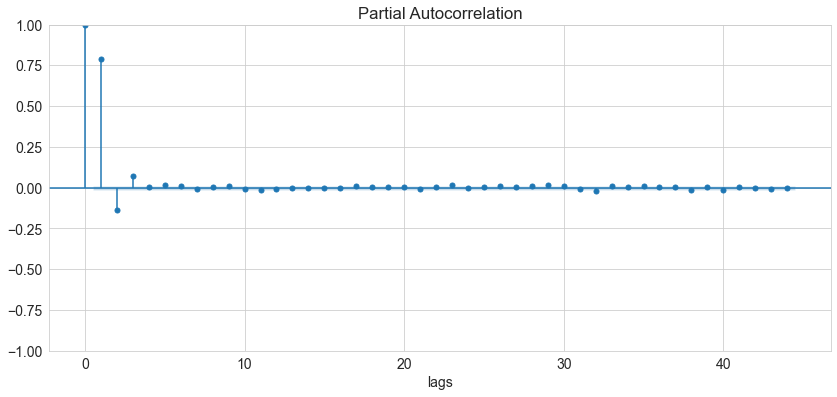

In [4]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_train['remainder'])
plt.xlabel('lags');

In [5]:
selected_order = ar_select_order(df_train['remainder'], maxlag = 15)

In [6]:
print(f"The lag we need to include are {selected_order.ar_lags}")

The lag we need to include are [1, 2, 3]


### 2. Create lag1, lag3 and lag3

In [7]:
df_train['lag1'] = df_train['remainder'].shift(1)
df_train['lag2'] = df_train['remainder'].shift(2)
df_train['lag3'] = df_train['remainder'].shift(3)

In [8]:
# Drop missing values
df_train.dropna(inplace=True)
df_train.tail()

,TG,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3
DATE,,,,,,,,,,,,,,,,,,
2021-09-26,18.4,23401,0,0,0,0,0,0,0,1,0,0,0,15.476168,2.923832,1.323908,1.823985,-0.575939
2021-09-27,16.2,23402,0,0,0,0,0,0,0,1,0,0,0,15.476244,0.723756,2.923832,1.323908,1.823985
2021-09-28,12.6,23403,0,0,0,0,0,0,0,1,0,0,0,15.476320,-2.876320,0.723756,2.923832,1.323908
2021-09-29,11.4,23404,0,0,0,0,0,0,0,1,0,0,0,15.476397,-4.076397,-2.876320,0.723756,2.923832
2021-09-30,11.1,23405,0,0,0,0,0,0,0,1,0,0,0,15.476473,-4.376473,-4.076397,-2.876320,0.723756


In [9]:
#Inspect correlation
df_train.corr()

,TG,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3
TG,1.000000,0.083261,-0.301406,-0.189753,-0.031677,0.152515,0.281950,0.362497,0.339620,0.188796,0.014546,-0.176458,-0.303876,0.836215,0.548409,0.438504,0.323586,0.251534
timestep,0.083261,1.000000,-0.001307,-0.000113,0.001239,0.002635,0.003938,0.005383,0.006780,0.000732,-0.006926,-0.005454,-0.004178,0.099585,-0.000023,0.000090,0.000179,0.000222
month_2,-0.301406,-0.001307,1.000000,-0.088063,-0.086502,-0.088063,-0.086502,-0.088063,-0.088063,-0.087163,-0.088063,-0.086502,-0.088063,-0.360441,-0.000004,-0.003798,-0.006225,-0.007788
month_3,-0.189753,-0.000113,-0.088063,1.000000,-0.090986,-0.092628,-0.090986,-0.092628,-0.092628,-0.091681,-0.092628,-0.090986,-0.092628,-0.226917,-0.000004,-0.002995,-0.006220,-0.008107
month_4,-0.031677,0.001239,-0.086502,-0.090986,1.000000,-0.090986,-0.089373,-0.090986,-0.090986,-0.090056,-0.090986,-0.089373,-0.090986,-0.037879,-0.000004,-0.000080,0.001534,0.002469
month_5,0.152515,0.002635,-0.088063,-0.092628,-0.090986,1.000000,-0.090986,-0.092628,-0.092628,-0.091681,-0.092628,-0.090986,-0.092628,0.182391,-0.000004,0.001898,0.003206,0.003326
month_6,0.281950,0.003938,-0.086502,-0.090986,-0.089373,-0.090986,1.000000,-0.090986,-0.090986,-0.090056,-0.090986,-0.089373,-0.090986,0.337178,-0.000004,0.001602,0.002864,0.004065
month_7,0.362497,0.005383,-0.088063,-0.092628,-0.090986,-0.092628,-0.090986,1.000000,-0.092628,-0.091681,-0.092628,-0.090986,-0.092628,0.433502,-0.000004,0.000978,0.000491,0.001005
month_8,0.339620,0.006780,-0.088063,-0.092628,-0.090986,-0.092628,-0.090986,-0.092628,1.000000,-0.091681,-0.092628,-0.090986,-0.092628,0.406144,-0.000004,0.006222,0.012264,0.017547
month_9,0.188796,0.000732,-0.087163,-0.091681,-0.090056,-0.091681,-0.090056,-0.091681,-0.091681,1.000000,-0.091681,-0.090056,-0.091681,0.225747,0.000044,-0.000744,-0.001502,-0.000824


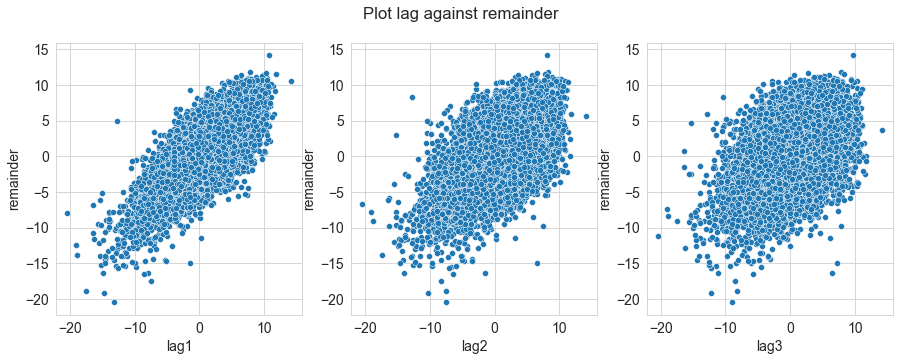

In [10]:
#Plot the remainder against lag1
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Plot lag against remainder')
sns.scatterplot(ax=axes[0], x='lag1', y='remainder', data=df_train)
sns.scatterplot(ax=axes[1], x='lag2', y='remainder', data=df_train)
sns.scatterplot(ax=axes[2], x='lag3', y='remainder', data=df_train);

**Observation:**
* There is some sort of linear dependency between the variables

### 3. Create a full model

In [11]:
X_train = df_train.drop(columns=['TG', 'trend_seasonal', 'remainder'])
y_train = df_train['TG']

In [12]:
m_full = LinearRegression()
m_full.fit(X_train, y_train)

LinearRegression()

In [13]:
print(f"The R2 score of 'm_full' for df_train is {round(m_full.score(X_train, y_train), 2)}")

The R2 score of 'm_full' for df_train is 0.89


In [14]:
# Add the predicted values to df_train
df_train['predictions_full_model'] = m_full.predict(X_train)

### 4) - Plot the prediction vs passengers for the training data

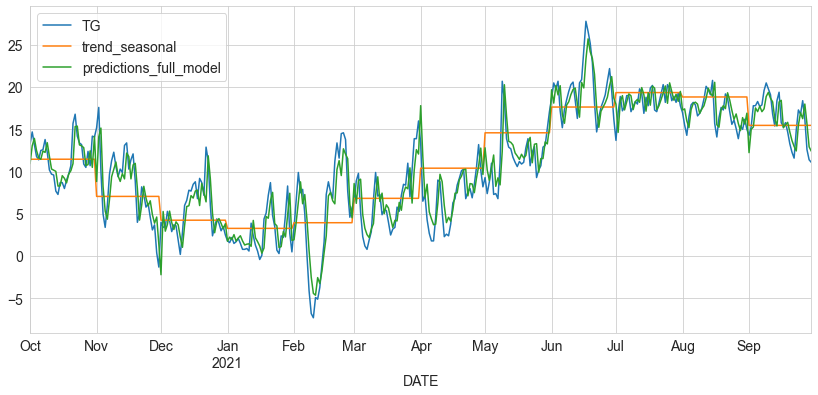

In [15]:
df_train[['TG', 'trend_seasonal', 'predictions_full_model']].iloc[-365:,:].plot();

### 5. Save file with pickle

In [16]:
with open('./data/df_trend_season_lags.bin', 'wb') as f:
    pickle.dump(df_train, f)

In [17]:
with open('./data/m_full.bin', 'wb') as f:
    pickle.dump(m_full, f)